In [97]:
# Python code for the plot
# Code "borrowed" from: https://en.wikipedia.org/wiki/Geometric_Brownian_motion and its cited sources

import numpy as np
import matplotlib.pyplot as plt

def calcR(entry2, entry1):
    return (entry2 / entry1) - 1.0 #something

def calcMu(entries):
    mu = 0
    for i in range(len(entries) - 1):
        mu += calcR(entries[i+1], entries[i])
    
    mu /= len(entries)
    return mu

def calcSigma(entries, mu):
    sigma = 0
    for i in range(len(entries) - 1):
        sigma += (calcR(entries[i+1], entries[i]) - mu) ** 2 #sum (Ri - MU)^2
    
    sigma = (sigma / len(entries)) ** (0.5) #square_root(1/sigma * that sum)
    return sigma

In [94]:
prices = [3.0, 2.5, 2.3, 2.6, 3.0, 2.9, 3.5]

#np.random.seed(1) #Seed the RNG

In [102]:
mu = calcMu(prices) # percentage drift
n = 50  # number of time units to predict
dt = 0.1 # granularity of prediction
x0 = prices[0] # inital value
sigma = np.full(1, calcSigma(prices, mu)) # percentage volatility (put in a numpy array of size 1)

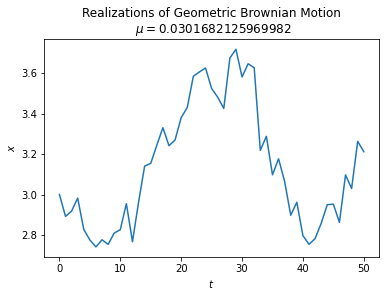

In [104]:
x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)
# Solution function:
# GBM = X0 * e ^ ((mu - (sigma^2 / 2) ) * t + sigma * Wt

plt.plot(x)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $\mu=" + str(mu) + "$"
)
plt.show()